In [137]:
pix = 0.0225 #1pixel=0.0225µm

In [138]:
fociID = input()

0A


In [146]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
celldf = pd.read_csv('/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/results/Results_pos%s.xls' %fociID,sep='\t')

In [148]:
celldf  = celldf.drop('Mean',1)
celldf = celldf.drop('X',1)
celldf = celldf.drop('Y',1)
celldf = celldf.drop('Perim.',1)
celldf = celldf.drop('Major',1)
celldf = celldf.drop('Minor',1)
celldf.Area = celldf.Area*pix**2
celldf.XM = celldf.XM*pix
celldf.YM = celldf.YM*pix
celldf.head(3)

ValueError: labels ['Mean'] not contained in axis

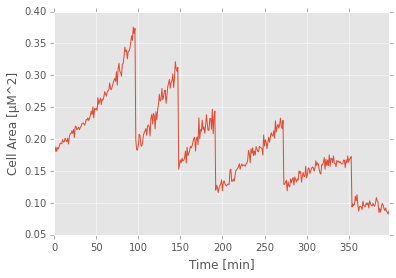

In [152]:
#Original data is in reverse-chronological because of backwards tracking in ImageJ
#Reverse order here so dataframe matches chronological order
celldf =celldf.reindex(index=celldf.index[::-1])
celldf = celldf.reset_index(drop=True)
ax1 = celldf.Area.plot()
ax1.set_ylabel('Cell Area [µM^2]')
ax1.set_xlabel('Time [min]')

filename = "Cell Area %s.pdf"%fociID
savedir ='/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/Graphs/'
plt.savefig(savedir+filename)

In [151]:
celldf.head(3)

,,Label,Area,XM,YM,Angle
0,1,Binarized:0400-0100-0298:Pos00399,0.087581,6.712222,2.245522,75.078
1,2,Binarized:0399-0100-0298:Pos00398,0.082519,6.706035,2.219985,78.998
2,3,Binarized:0398-0100-0298:Pos00397,0.085556,6.702660,2.239290,77.949


In [153]:
focidf = pd.read_csv('/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/FociResults/FociResults_Pos%s.xls'%fociID,sep='\t')


focidf = focidf.drop('Label', 1)
focidf = focidf.drop('Min', 1)
focidf = focidf.drop('Max', 1)
focidf = focidf.drop('Slice', 1)
focidf = focidf.drop(399) #the cell ROI data lacks the first slice, so delete it here to match
focidf.XM = focidf.XM*pix
focidf.YM = focidf.YM*pix
focidf =focidf.reindex(index=focidf.index[::-1])
focidf = focidf.reset_index(drop=True)

cellfocidisp = ((celldf.XM-focidf.XM)**2+(celldf.YM-focidf.YM)**2)**(1/2) 
#cellfocidisp.plot(label = 'Distance between Cell Center and Foci').legend(loc='upper left', bbox_to_anchor=(1, 0.5))

In [154]:
brightness = pd.read_csv('/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/BrightnessResults/BrightnessResults_Pos%s.xls'%fociID,sep='\t')
brightness = brightness.drop('Min',1)
brightness = brightness.drop(' ',1)
brightness = brightness.drop(399)
brightness.Max.head(10).mean()

594.8

In [155]:
cellx = celldf['XM']
celly = celldf['YM']
celldisp = pd.Series(((cellx[i+1]-cellx[i])**2+(celly[i+1]-celly[i])**2)**(1/2) for i in range (len(cellx)-1))
#celldisp.plot()

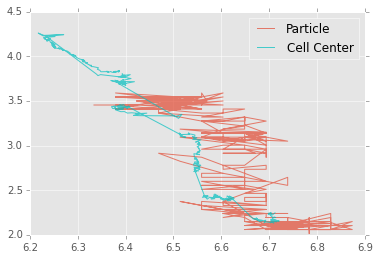

In [156]:
plt.figure();
plt.plot(focidf.XM, focidf.YM, alpha = 0.7, label = 'Particle')
plt.plot(celldf.XM, celldf.YM, 'c-', alpha = 0.7, label = 'Cell Center')

plt.legend()
filename = "cellfocitrack%s.pdf"%fociID
plt.savefig(savedir+filename)

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


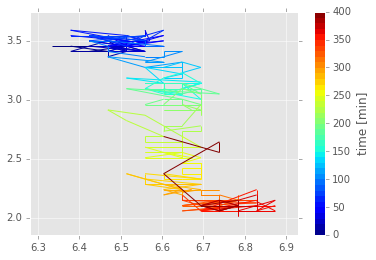

In [157]:
#Create time-coloured trajectory
from matplotlib.collections import LineCollection
from matplotlib import cm

xy = focidf[['XM','YM']].values
z = np.linspace(0, 1, len(focidf))

min, max = (0, len(focidf))
step = 10 #step in color bar

#Using contourf to provide colorbar info, then clearing the figure
Q = [[0,0],[0,0]]
levels = range(min,max+step,step)
CS3 = plt.contourf(Q, levels, cmap=cm.jet)
plt.clf()

lc = LineCollection(zip(xy[:-1], xy[1:]), array=z, cmap=cm.jet)

fig,  ax = plt.subplots(1, 1)
ax.add_collection(lc)
ax.margins(0.1)
ax2= fig.colorbar(CS3)
ax2.set_label('time [min]')
#plt.show()

fig1 = plt.gcf()
filename = "focitrajectory%s.pdf"%fociID

fig1.savefig(savedir+filename)

References for above plot:

http://stackoverflow.com/questions/32039080/cmap-for-use-with-line-plot

http://stackoverflow.com/questions/17682613/how-to-convert-a-pandas-dataframe-subset-of-columns-and-rows-into-a-numpy-array

http://villageofsound.hatenadiary.jp/entry/2015/09/13/010352

http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots

It might be interesting if I normalize several foci's coordinates (by setting initial position as [0,0]), and plotting all the trajectories into the same heatmap. Looks like the foci is largely confined in the beginning (which is the result of cell position), moves with the cell, and moves rather vigourously in the last segment (at least in foci4A-C).

$$ \mbox{MSD}(\Delta t) = \frac{\sum_0^{T - \Delta t} ||\mathbf{r}(t + \Delta t) - \mathbf{r}(t)||^2}{(T - \Delta t) / \delta t} = \frac{d_{t, t+\Delta t}}{(T - \Delta t) / \delta t} $$

In [158]:
## Number of points in the trajectories
#n_points = 1000

## Time step between two points
t_step = 1

msddf = focidf.drop(' ',1)
msddf.index=pd.Index(np.arange(len(msddf)), name='t_stamp')
msddf['t'] = np.arange(len(msddf)) * t_step

def compute_msd(trajectory, t_step, coords=['XM', 'YM']):
    numberofDeltaT = int(np.floor(len(trajectory)/4))
    delays = trajectory.t[:numberofDeltaT]
    shifts = np.floor(delays/t_step).astype(np.int)
    msds = np.zeros(numberofDeltaT, dtype=object)
    for i, shift in enumerate(shifts):
        diffs = trajectory[coords] - trajectory[coords].shift(-shift)
        sqdist = np.square(diffs).sum(axis=1)
        msds[i] = sqdist.mean()
    return delays, msds

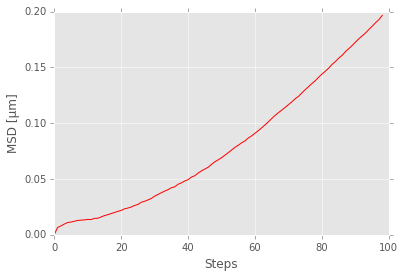

In [160]:
delays, msds = compute_msd(msddf, t_step=t_step)


plt.plot(delays, msds, '-r')
plt.xlabel('Steps')
plt.ylabel('MSD [µm]')

In [47]:
len(msds)

99

In [48]:
#t_step = 2
#numberofDeltaT = int(np.floor(len(msddf)/4))
#delays = msddf.t[:numberofDeltaT]
#shifts = np.floor(delays[:numberofDeltaT]/t_step).astype(np.int)
#msds1 = np.zeros(numberofDeltaT)
#for i, shift in enumerate(shifts):
#       diffs = msddf[['XM','YM']] -msddf[['XM','YM']].shift(-shift)
#      sqdist = np.square(diffs).sum(axis=1)
#      msds1[i] = sqdist.mean()

In [161]:
rad = np.radians(celldf['Angle']) #convert cell ROI long axis angle to radians

radfoci = rad-np.arctan2(focidf['YM'],focidf['XM']) #convert foci polar coordinate theta taking into account the ROI's angle

polardisp= pd.Series((cellfocidisp[i+1]**2+cellfocidisp[i]**2-2*cellfocidisp[i]*cellfocidisp[i+1]*np.cos(radfoci[i+1]-radfoci[i]))**(1/2) for i in range (len(cellfocidisp)-1))

#polardisp.plot(label = 'Polar Displacement').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [171]:
#Replace the outliers in Polar displacements with mean
for x in polardisp:
    if x>0.2:
        polardisp[polardisp == x]=polardisp.mean()

In [172]:
focix = focidf['XM']
fociy = focidf['YM']
cartdisp = pd.Series(((focix[i+1]-focix[i])**2+(fociy[i+1]-fociy[i])**2)**(1/2) for i in range (len(focix)-1))
#cartdisp.plot(label = 'Cartesian Displacement').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [173]:
#ax = polardisp.plot(label = 'Polar Displacement', alpha = 0.7, figsize=(15,4))
#cartdisp.plot( label = 'Cartesian Displacement', alpha = 0.7, ax=ax)
#celldisp.plot(label='Cell Center Displacement', alpha=0.7, color='orange', ax=ax)

#ax.legend(loc='upper left')

#celldf.Area.plot(ax = ax2, color = '#E8D66F', label = 'Cell Area',  alpha = 0.7)


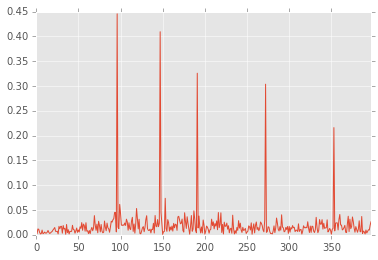

In [188]:
celldisp.plot()

In [175]:
dispdf = pd.DataFrame({'Cartesian': cartdisp, 'Polar': polardisp})
#dispdf.head(3)

#plt.figure();
#dispdf.hist(bins=[0,4,8,12,16], color='Black', alpha=0.7)

In [176]:
#extract division timepoints
division = celldisp[celldisp>0.1].index 

#Set generation number for each timepoint
generation = pd.Series(range(len(polardisp)+1))

for i in range(len(division)+1):
    if i == 0: #Generation1
        generation[:division[i]+1]= 1
    elif i == len(division): #Last Generation
        generation[division[i-1]:]=i+1
    else:    
        generation[division[i-1]+1:division[i]+1]= i+1

In [177]:
generation[generation.tail(1).index]

398    6
dtype: int64

In [178]:
celldf['Foci X'] = focix
celldf['Foci Y'] = fociy
celldf['Cartesian_Displacement'] = cartdisp
celldf['Polar_Displacement'] = polardisp
celldf['Generation'] = generation
celldf['Fluorescence_Intensity'] = brightness['Max']
celldf.to_csv('/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/data_pos%s.csv'%fociID, sep=',')

In [179]:
#Set first 10 brightness measurements from max intensity as characteristic foci brightness
foci_brightness = brightness.Max[brightness.Max.idxmax():brightness.Max.idxmax()+10].mean()

#Set Per-Generation DataFrame
gendf = pd.DataFrame()

gendf['Generation_Time']=celldf.groupby('Generation').size()
gendf['Elongation_Rate'] =(np.log(celldf.groupby('Generation')["Area"].last() /celldf.groupby('Generation')["Area"].first()))
gendf['Fluorescence_Intensity'] = foci_brightness

gendf['Mean_Cartesian_Displacement'] = celldf.groupby('Generation')['Cartesian_Displacement'].mean()
gendf['CV_Cartesian_Displacement'] = celldf.groupby('Generation')['Cartesian_Displacement'].std(ddof=1)/celldf.groupby('Generation')['Cartesian_Displacement'].mean()

gendf['Mean_Polar_Displacement'] = celldf.groupby('Generation')['Polar_Displacement'].mean()
gendf['CV_Polar_Displacement'] = celldf.groupby('Generation')['Polar_Displacement'].std(ddof=1)/celldf.groupby('Generation')['Polar_Displacement'].mean()
gendf['SD_Polar_Displacement'] = celldf.groupby('Generation')['Polar_Displacement'].std(ddof=1)
gendf['Foci_ID'] = fociID
gendf.index.name = 'Generation'

#omit first and last generation
gendf = gendf.drop(1)
gendf = gendf.drop(gendf.tail(1).index)

#gendf.to_csv('/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/generationdata_pos%s.csv'%fociID, sep=',')

In [180]:
lineage = pd.Series()
#create dataframe omitting 1st and last generations
lindf = celldf[(celldf.Generation>1)&(celldf.Generation<(len(division)+1))]

lineage['ID'] = fociID
lineage['Lineage_Length'] =gendf.Generation_Time.sum()
lineage['Lineage_Elongation_Rate'] = (np.log(lindf.groupby('Generation')["Area"].last() /lindf.groupby('Generation')["Area"].first())).sum()/lineage.Lineage_Length
lineage['Mean_Cartesian_Displacement'] = lindf['Cartesian_Displacement'].mean()
lineage['CV_Cartesian_Displacement'] = lindf['Cartesian_Displacement'].std(ddof=1)/lindf['Cartesian_Displacement'].mean()
lineage['Mean_Polar_Displacement'] = lindf['Polar_Displacement'].mean()
lineage['CV_Polar_Displacement'] = lindf['Polar_Displacement'].std(ddof=1)/lindf['Polar_Displacement'].mean()

lineage.to_csv('/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/lineagedata_pos%s.csv'%fociID, sep=',')

In [181]:
lineage

ID                                     0A
Lineage_Length                        256
Lineage_Elongation_Rate        0.00720627
Mean_Cartesian_Displacement     0.0596072
CV_Cartesian_Displacement        0.770806
Mean_Polar_Displacement         0.0399414
CV_Polar_Displacement            0.804664
dtype: object

In [182]:
## create independent dataframe for each generation
gendict = {x: celldf[celldf.Generation == x] for x in range(1,len(division)+2)}
for x in range(1,len(division)+2):
    gendict[x]['t'] = np.arange(len(gendict[x])) 

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


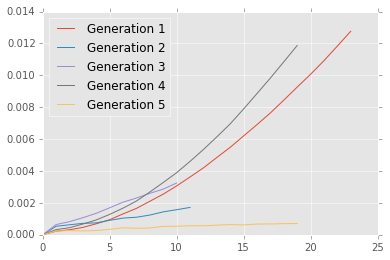

In [183]:
genmsds = {}
for x in range(1,len(division)+1):
    delays, msds =compute_msd(gendict[x],  t_step=1)
    plt.plot(delays, msds, label = 'Generation %s'%x)
    genmsds[x] = msds
plt.legend(loc='upper left')

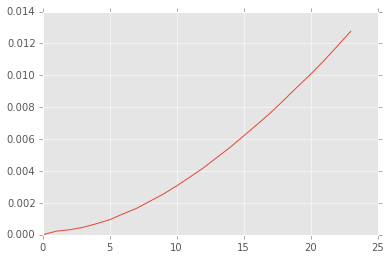

In [184]:
plt.plot(genmsds[1])

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


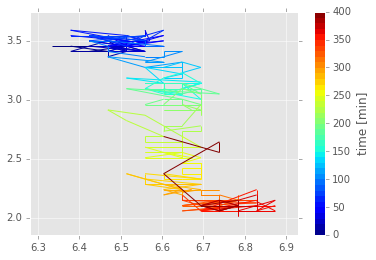

In [185]:
#Create time-coloured trajectory
from matplotlib.collections import LineCollection
from matplotlib import cm

xy = focidf[['XM','YM']].values
z = np.linspace(0, 1, len(focidf))

min, max = (0, len(focidf))
step = 10 #step in color bar

#Using contourf to provide colorbar info, then clearing the figure
Q = [[0,0],[0,0]]
levels = range(min,max+step,step)
CS3 = plt.contourf(Q, levels, cmap=cm.jet)
plt.clf()
lc = LineCollection(zip(xy[:-1], xy[1:]), array=z, cmap=cm.jet)
fig,  ax = plt.subplots(1, 1)
ax.add_collection(lc)
ax.margins(0.1)
ax2= fig.colorbar(CS3)
ax2.set_label('time [min]')
#plt.show()

#fig1 = plt.gcf()

#Calculate MSD
t_step = 1

msddf = focidf.drop(' ',1)
msddf.index=pd.Index(np.arange(len(msddf)), name='t_stamp')
msddf['t'] = np.arange(len(msddf)) * t_step

def compute_msd(trajectory, t_step, coords=['XM', 'YM']):
    numberofDeltaT = int(np.floor(len(msddf)/4))
    delays = trajectory.t[:numberofDeltaT]
    shifts = np.floor(delays[:numberofDeltaT]/t_step).astype(np.int)
    msds = np.zeros(numberofDeltaT)
    for i, shift in enumerate(shifts):
        diffs = trajectory[coords] - trajectory[coords].shift(-shift)
        sqdist = np.square(diffs).sum(axis=1)
        msds[i] = sqdist.mean()
    return delays, msds

delays, msds = compute_msd(msddf, t_step=t_step)

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


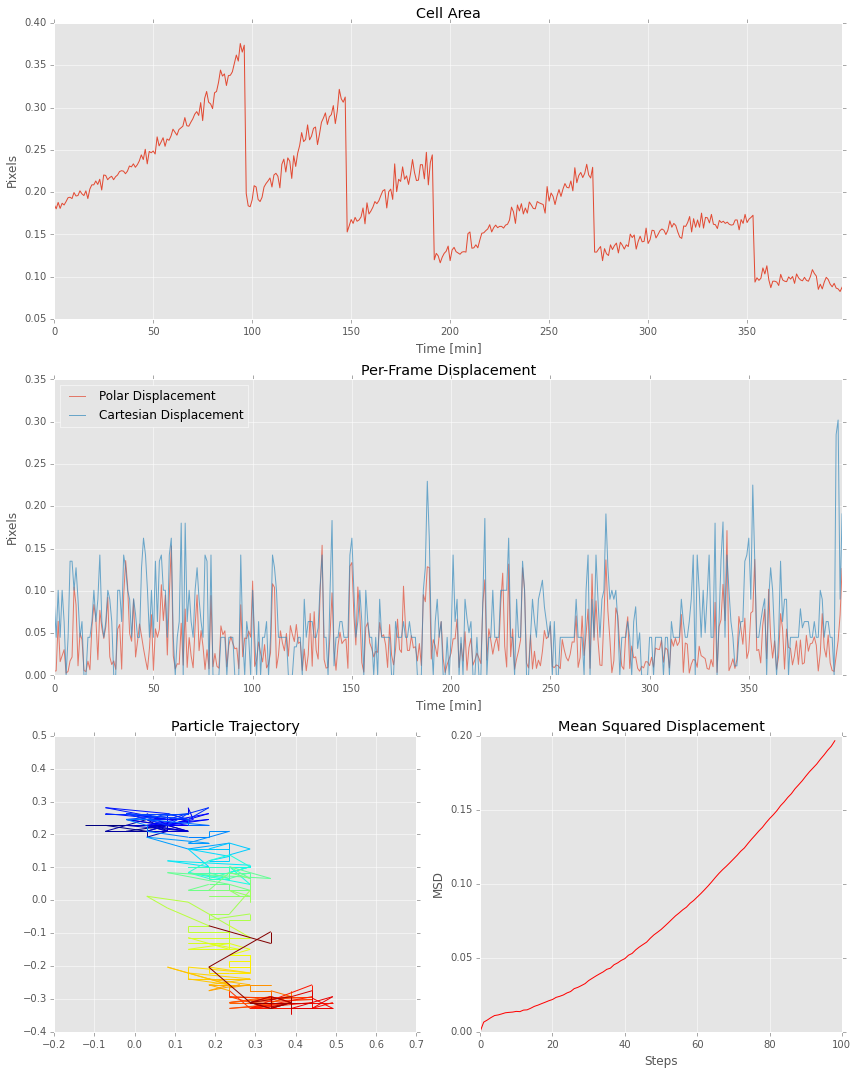

In [186]:
#Generate Summary Fig

#plt.suptitle('Summary of Foci %s' %fociID,  fontsize=20, y = 1.02)

ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
ax2 = plt.subplot2grid((3,2), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,2), (2, 0))
ax4 = plt.subplot2grid((3,2), (2, 1))

celldf.Area.plot(ax=ax1, figsize = (12,15))
ax1.set_title('Cell Area')
ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Pixels')

polardisp.plot(label = 'Polar Displacement', alpha = 0.7, ax=ax2)
cartdisp.plot( label = 'Cartesian Displacement', alpha = 0.7, ax=ax2)
ax2.set_title('Per-Frame Displacement')
ax2.legend(loc='upper left')
ax2.set_xlabel('Time [min]')
ax2.set_ylabel('Pixels')


ax3.add_collection(lc,autolim=True)
ax3.autoscale_view() 
ax3.set_title('Particle Trajectory')
#ax5= fig.colorbar(CS3)
#ax5.set_label('time [min]')
#ax3.plot(celldf.XM, celldf.YM, 'c-',label = 'Cell Center')
#ax3.legend(loc='lower left')

ax4.plot(delays, msds, 'r')
ax4.set_title('Mean Squared Displacement')
ax4.set_xlabel('Steps')
ax4.set_ylabel('MSD')

plt.tight_layout()

filename = "Summary Foci%s.png"%fociID
savedir ='/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/Graphs/'
#plt.savefig(savedir+filename)

### References
#### MSD
http://stackoverflow.com/questions/7489048/calculating-mean-squared-displacement-msd-with-matlab#

http://damcb.com/mean-square-disp.html

### Influence of Generation Time upon Correlation between Cell Growth and Mean Polar Displacement
In the case of position 7A, generations with generation times 86 and 89min were not on the trend shown on generations below 60min. Perhaps I could improve correlation by ommiting long generations.

-> Update: this seems not to be a general thing... 

-> Update: the second and second last generations seem to be likely to be outliers? pos5F

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


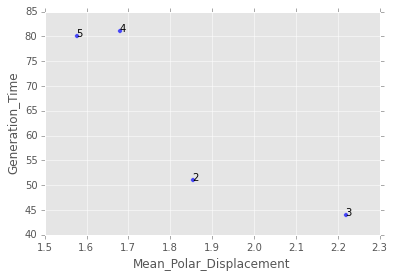

In [126]:
ax = gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Generation_Time', alpha=0.7,color='Blue')
for i, txt in enumerate(gendf.index):
    ax.annotate(txt, (gendf.Mean_Polar_Displacement.iloc[i],gendf.Generation_Time.iloc[i]))

### 150909BossDiscussion
- Check relation of foci displacement and cell size. Larger cells mean that the foci would appear to move longer compared to that within smaller cells.
- Per-frame cell size and per-frame foci displacement correlation = linear?
- Fit cell elongation with a exponential function and obtain smoothed cell size
- Compare two distinct foci within cells with same size: will their displacement differ?


In [ ]:
celldf.plot(kind='scatter', x='Area', y='Polar_Displacement');